### Reading data from a social network survey

Let us start by downloading and installing the package

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import networkx as nx
import pandas as pd

Read the nodes and check the different columns via index.values

In [4]:
G = nx.Graph()
fn=pd.read_csv('/Users/marta/CE88_II/Lec3/SchoolNodes.csv',delimiter=' ',index_col=0).transpose()
n_attr=len(fn.index.values)
attr=fn.index.values 

In [11]:
print(fn.head())

Id      1    2    3    4    5    6    7    8    9    10   ...  102  103  104  \
Label     1    2    3    4    5    6    7    8    9   10  ...  102  103  104   
Nodes     1    2    3    4    5    6    7    8    9   10  ...  102  103  104   
Gender    1    2    1    2    2    2    1    2    1    2  ...    1    1    2   
Race      1    1    5    1    3    1    1    1    1    1  ...    1    1    1   
Grade    10   12    8   12   12   12    7   11   10   12  ...    9    7   10   

Id      105  106  107  108  109  110  111  
Label   105  106  107  108  109  110  111  
Nodes   105  106  107  108  109  110  111  
Gender    1    2    2    1    1    1    2  
Race      1    1    1    1    1    1    1  
Grade     8    8    8   11   10   12    9  

[5 rows x 111 columns]


In [5]:
fn.columns.values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111])

Question 1: Check the types of the variables above and what do they contain

In [6]:
type(n_attr) #Number of attributes for nodes in the columns

int

In [13]:
n_attr

7

In [12]:
attr

array(['Label', 'Nodes ', 'Gender', 'Race', 'Grade', 'Scode', 'totalnoms'],
      dtype=object)

In [14]:
type(G) #Class Digraph from networkx

networkx.classes.graph.Graph

In [15]:
type(fn)  #DataFrame from pandas

pandas.core.frame.DataFrame

In [16]:
fn
#fn.index.values has the different rodes of the 7 attributes 
#fn.clolumns.values has the ids

Id,1,2,3,4,5,6,7,8,9,10,...,102,103,104,105,106,107,108,109,110,111
Label,1,2,3,4,5,6,7,8,9,10,...,102,103,104,105,106,107,108,109,110,111
Nodes,1,2,3,4,5,6,7,8,9,10,...,102,103,104,105,106,107,108,109,110,111
Gender,1,2,1,2,2,2,1,2,1,2,...,1,1,2,1,2,2,1,1,1,2
Race,1,1,5,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Grade,10,12,8,12,12,12,7,11,10,12,...,9,7,10,8,8,8,11,10,12,9
Scode,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
totalnoms,0,0,3,4,10,10,9,8,4,3,...,0,5,7,10,9,9,1,10,8,0


In [32]:
fn.index.values

array(['Label', 'Nodes ', 'Gender', 'Race', 'Grade', 'Scode', 'totalnoms'],
      dtype=object)

In [33]:
fn.columns.values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111])

In [17]:
for n in fn.columns:
        #attr_node=dict(list(zip(attr, fn[n].values)))
        print(attr," ",fn[n].values[6])
        #print(n)
        G.add_node(n,label=fn[n].values[0],nodes=fn[n].values[1],gender=fn[n].values[2],
               race=fn[n].values[3],grade=fn[n].values[4],scode=fn[n].values[5],totalnoms=fn[n].values[6])

['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   0
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   0
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   3
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   4
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   10
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   10
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   9
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   8
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   4
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   3
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   9
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   10
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   10
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totalnoms']   10
['Label' 'Nodes ' 'Gender' 'Race' 'Grade' 'Scode' 'totaln

In [18]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111))

Question 2: Write the grade of node 33

In [20]:
G.nodes[33]['grade']

9

In [21]:
for node in G.nodes():
    print (node," is in grade",G.nodes[node]['grade'])

1  is in grade 10
2  is in grade 12
3  is in grade 8
4  is in grade 12
5  is in grade 12
6  is in grade 12
7  is in grade 7
8  is in grade 11
9  is in grade 10
10  is in grade 12
11  is in grade 9
12  is in grade 7
13  is in grade 10
14  is in grade 9
15  is in grade 7
16  is in grade 10
17  is in grade 12
18  is in grade 11
19  is in grade 7
20  is in grade 12
21  is in grade 9
22  is in grade 11
23  is in grade 12
24  is in grade 7
25  is in grade 10
26  is in grade 8
27  is in grade 10
28  is in grade 11
29  is in grade 12
30  is in grade 8
31  is in grade 12
32  is in grade 8
33  is in grade 9
34  is in grade 7
35  is in grade 10
36  is in grade 12
37  is in grade 8
38  is in grade 10
39  is in grade 7
40  is in grade 7
41  is in grade 8
42  is in grade 7
43  is in grade 8
44  is in grade 9
45  is in grade 7
46  is in grade 11
47  is in grade 12
48  is in grade 7
49  is in grade 11
50  is in grade 7
51  is in grade 9
52  is in grade 7
53  is in grade 9
54  is in grade 7
55  is in g

In [22]:
fl=pd.read_csv('SchoolEdges.csv',delimiter=' ')
fl.columns = list(map(str.lower, fl.columns))

In [23]:
fl

,source,target,type,id,label,weight
0,3,37,Directed,2127,NaN,1.0
1,3,41,Directed,2128,NaN,1.0
2,3,105,Directed,2129,NaN,1.0
3,4,35,Directed,2130,NaN,2.0
4,4,62,Directed,2131,NaN,1.0
...,...,...,...,...,...,...
452,110,29,Directed,2579,NaN,5.0
453,110,60,Directed,2580,NaN,3.0
454,110,62,Directed,2581,NaN,5.0
455,110,80,Directed,2582,NaN,3.0


In [24]:
fl.columns.values

array(['source', 'target', 'type', 'id', 'label', 'weight'], dtype=object)

In [25]:
fl.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [26]:
for L in fl.index.values:
        G.add_edge(fl['source'][L],fl['target'][L],weight=fl['weight'][L])

In [29]:
G.degree()

DegreeView({1: 0, 2: 2, 3: 3, 4: 8, 5: 6, 6: 3, 7: 18, 8: 4, 9: 8, 10: 4, 11: 8, 12: 8, 13: 10, 14: 9, 15: 10, 16: 6, 17: 2, 18: 10, 19: 5, 20: 4, 21: 2, 22: 3, 23: 4, 24: 12, 25: 2, 26: 11, 27: 5, 28: 3, 29: 2, 30: 7, 31: 4, 32: 10, 33: 6, 34: 11, 35: 7, 36: 5, 37: 4, 38: 12, 39: 12, 40: 18, 41: 9, 42: 4, 43: 8, 44: 2, 45: 14, 46: 12, 47: 4, 48: 11, 49: 7, 50: 11, 51: 13, 52: 12, 53: 7, 54: 2, 55: 5, 56: 11, 57: 6, 58: 10, 59: 8, 60: 3, 61: 2, 62: 5, 63: 11, 64: 0, 65: 10, 66: 10, 67: 0, 68: 3, 69: 16, 70: 9, 71: 2, 72: 5, 73: 3, 74: 5, 75: 12, 76: 6, 77: 5, 78: 8, 79: 8, 80: 4, 81: 8, 82: 4, 83: 4, 84: 12, 85: 2, 86: 7, 87: 6, 88: 7, 89: 7, 90: 4, 91: 10, 92: 12, 93: 1, 94: 5, 95: 6, 96: 4, 97: 7, 98: 2, 99: 8, 100: 6, 101: 7, 102: 6, 103: 6, 104: 7, 105: 8, 106: 15, 107: 9, 108: 3, 109: 9, 110: 9, 111: 4})

## Here we keep only nodes with greater than 0

In [30]:
deg = G.degree()
to_keep = []
for node in G.nodes():
    if deg[node] != 0:
        to_keep.append(node)
    else:
        print("Node: ",node," degree: ",deg[node])
#Create the network only with connected nodes
G=G.subgraph(to_keep)

Node:  1  degree:  0
Node:  64  degree:  0
Node:  67  degree:  0


In [31]:
print ("Nodes: ", G.nodes())

Nodes:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]


In [114]:
G.number_of_nodes()

108

In [115]:
G.number_of_edges()

378

#### Write the neighbours of each node 

Note that we use predessceors and successors if the graph is undirected

Question 3:
Check here https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.MultiDiGraph.predecessors.html
The function DiGraph.predecessors() and write the nodes that nominated each node


In [42]:
sum_p=0
for node in G.nodes():
    print ("Node ", node, " is connected to: ", list(G.neighbors(node)))
    sum_p=sum_p+len(list(G.neighbors(node)))

Node  2  is connected to:  [14, 56]
Node  3  is connected to:  [37, 41, 105]
Node  4  is connected to:  [35, 62, 100, 110, 5, 23, 38, 75]
Node  5  is connected to:  [4, 23, 46, 49, 56, 91]
Node  6  is connected to:  [17, 55, 110]
Node  7  is connected to:  [24, 34, 39, 40, 45, 48, 69, 92, 12, 15, 43, 50, 52, 70, 86, 89, 101, 106]
Node  8  is connected to:  [18, 65, 79, 81]
Node  9  is connected to:  [35, 38, 65, 104, 18, 66, 69, 88]
Node  10  is connected to:  [77, 20, 47, 55]
Node  11  is connected to:  [21, 63, 82, 84, 87, 102, 111, 51]
Node  12  is connected to:  [7, 19, 34, 39, 40, 45, 50, 70]
Node  13  is connected to:  [18, 38, 46, 51, 53, 56, 66, 75, 88, 106]
Node  14  is connected to:  [2, 17, 19, 25, 59, 68, 81, 103, 107]
Node  15  is connected to:  [7, 24, 34, 39, 40, 45, 48, 92, 70, 101]
Node  16  is connected to:  [57, 65, 95, 96, 19, 47]
Node  17  is connected to:  [6, 14]
Node  18  is connected to:  [8, 9, 13, 28, 84, 90, 97, 100, 19, 81]
Node  19  is connected to:  [12, 

In [40]:
sum_p

756

Check here if we read the network as directed we use succcesors and predeccessors https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.MultiDiGraph.successors.html
The function DiGraph.succesors() and write the nodes that each node nominated

Question 4: Write the number of nodes and edges

In [43]:
#Number of nodes and links of G
NumNodes = G.number_of_nodes()
NumEdges = G.number_of_edges()
print("Number of nodes: ",NumNodes)
print(("Number of links: ",NumEdges))

Number of nodes:  108
('Number of links: ', 378)


Question 5: Write the average in_degree, out_degree, and degree of the network
    

In [47]:
print("Average degree: ",np.mean(list(dict(G.degree()).values())))

Average degree:  7.0


In [52]:
(2*G.number_of_edges())/G.number_of_nodes()

7.0

In [54]:
av_weightsNodes = {} 
for node in G.nodes():
    sumw=0
    lfriends = list(G.neighbors(node))
    print ("Nominated by ", node, " are : ", list(G.neighbors(node)))
    for i in lfriends:
        sumw=sumw+G[node][i]['weight']
        print (node,i,G[node][i]['weight'])
    if G.degree(node)>0:
        print ("Total out-weight:",sumw,"w-degree:",G.degree(node),"Average-OutDeg:",sumw/G.degree(node))
        av_weightsNodes[node]=(sumw/G.degree(node))

Nominated by  2  are :  [14, 56]
2 14 3.0
2 56 1.0
Total out-weight: 4.0 w-degree: 2 Average-OutDeg: 2.0
Nominated by  3  are :  [37, 41, 105]
3 37 1.0
3 41 1.0
3 105 1.0
Total out-weight: 3.0 w-degree: 3 Average-OutDeg: 1.0
Nominated by  4  are :  [35, 62, 100, 110, 5, 23, 38, 75]
4 35 2.0
4 62 1.0
4 100 4.0
4 110 2.0
4 5 5.0
4 23 2.0
4 38 1.0
4 75 3.0
Total out-weight: 20.0 w-degree: 8 Average-OutDeg: 2.5
Nominated by  5  are :  [4, 23, 46, 49, 56, 91]
5 4 5.0
5 23 5.0
5 46 2.0
5 49 5.0
5 56 1.0
5 91 6.0
Total out-weight: 24.0 w-degree: 6 Average-OutDeg: 4.0
Nominated by  6  are :  [17, 55, 110]
6 17 2.0
6 55 2.0
6 110 3.0
Total out-weight: 7.0 w-degree: 3 Average-OutDeg: 2.3333333333333335
Nominated by  7  are :  [24, 34, 39, 40, 45, 48, 69, 92, 12, 15, 43, 50, 52, 70, 86, 89, 101, 106]
7 24 1.0
7 34 1.0
7 39 2.0
7 40 1.0
7 45 1.0
7 48 2.0
7 69 1.0
7 92 5.0
7 12 1.0
7 15 1.0
7 43 2.0
7 50 2.0
7 52 1.0
7 70 1.0
7 86 1.0
7 89 1.0
7 101 5.0
7 106 1.0
Total out-weight: 30.0 w-degree: 18

Nominated by  73  are :  [83, 91, 107]
73 83 1.0
73 91 5.0
73 107 6.0
Total out-weight: 12.0 w-degree: 3 Average-OutDeg: 4.0
Nominated by  74  are :  [30, 43, 63, 106, 107]
74 30 1.0
74 43 4.0
74 63 2.0
74 106 5.0
74 107 1.0
Total out-weight: 13.0 w-degree: 5 Average-OutDeg: 2.6
Nominated by  75  are :  [38, 46, 54, 55, 56, 4, 13, 28, 97, 100, 104, 110]
75 38 1.0
75 46 4.0
75 54 3.0
75 55 4.0
75 56 2.0
75 4 3.0
75 13 5.0
75 28 2.0
75 97 1.0
75 100 3.0
75 104 4.0
75 110 2.0
Total out-weight: 34.0 w-degree: 12 Average-OutDeg: 2.8333333333333335
Nominated by  76  are :  [36, 46, 58, 65, 81, 90]
76 36 2.0
76 46 2.0
76 58 2.0
76 65 2.0
76 81 2.0
76 90 2.0
Total out-weight: 12.0 w-degree: 6 Average-OutDeg: 2.0
Nominated by  77  are :  [10, 20, 46, 69, 81]
77 10 3.0
77 20 1.0
77 46 4.0
77 69 1.0
77 81 3.0
Total out-weight: 12.0 w-degree: 5 Average-OutDeg: 2.4
Nominated by  78  are :  [66, 51, 53, 56, 57, 58, 96, 108]
78 66 2.0
78 51 1.0
78 53 5.0
78 56 5.0
78 57 3.0
78 58 3.0
78 96 3.0
78 108

In [56]:
av_weightsNodes

{2: 2.0,
 3: 1.0,
 4: 2.5,
 5: 4.0,
 6: 2.3333333333333335,
 7: 1.6666666666666667,
 8: 1.75,
 9: 2.0,
 10: 3.25,
 11: 3.125,
 12: 1.125,
 13: 2.2,
 14: 2.0,
 15: 1.5,
 16: 2.8333333333333335,
 17: 2.0,
 18: 1.8,
 19: 1.2,
 20: 2.25,
 21: 2.0,
 22: 1.0,
 23: 4.75,
 24: 2.25,
 25: 1.5,
 26: 2.090909090909091,
 27: 1.0,
 28: 1.3333333333333333,
 29: 3.0,
 30: 1.1428571428571428,
 31: 3.25,
 32: 2.0,
 33: 2.1666666666666665,
 34: 2.090909090909091,
 35: 2.142857142857143,
 36: 3.0,
 37: 2.25,
 38: 1.8333333333333333,
 39: 1.75,
 40: 1.8333333333333333,
 41: 1.8888888888888888,
 42: 2.75,
 43: 2.25,
 44: 1.0,
 45: 1.7857142857142858,
 46: 3.0833333333333335,
 47: 4.0,
 48: 2.6363636363636362,
 49: 3.142857142857143,
 50: 2.8181818181818183,
 51: 2.1538461538461537,
 52: 2.5833333333333335,
 53: 2.857142857142857,
 54: 2.5,
 55: 3.6,
 56: 2.727272727272727,
 57: 3.3333333333333335,
 58: 3.2,
 59: 1.125,
 60: 2.6666666666666665,
 61: 3.5,
 62: 2.4,
 63: 2.1818181818181817,
 65: 2.4,
 66: 1.9

In [57]:
type(av_weightsNodes)

dict

In [59]:
av_weightsNodes[2]

2.0

## Question 6: Calculate Average Clustering Coefficient, and average shortest path in the Network


In [60]:
nx.average_clustering(G)

0.32753670621317676

Before calculating the average shortest path we check if the graph is weakly connected, that is if in the 
nx.is_weakly_connected(G), a directed graph is called weakly connected if replacing all of its 
directed edges with undirected edges produces a connected (undirected) graph. 
This implies all nodes belong to one connected component

If our data set it is not weakly connected we extract the largest connected component to work with it. We see how later this week GSI section.

In [116]:
nx.average_shortest_path_length(G)

3.026479750778816

## Here we extract the list connected components

see documentation here: 
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html#networkx.algorithms.components.connected_components

In [117]:
S = [G.subgraph(c).copy() for c in sorted(nx.connected_components(G.to_undirected()), key=len, reverse=True)]  

In [118]:
len(S) #number of connected components

1

In [119]:
S[0].number_of_edges()

378

In [120]:
S[0].number_of_nodes()

108

In [121]:
[e for e in S[0].edges]

[(2, 14),
 (2, 56),
 (3, 37),
 (3, 41),
 (3, 105),
 (4, 35),
 (4, 62),
 (4, 100),
 (4, 110),
 (4, 5),
 (4, 23),
 (4, 38),
 (4, 75),
 (5, 23),
 (5, 46),
 (5, 49),
 (5, 56),
 (5, 91),
 (6, 17),
 (6, 55),
 (6, 110),
 (7, 24),
 (7, 34),
 (7, 39),
 (7, 40),
 (7, 45),
 (7, 48),
 (7, 69),
 (7, 92),
 (7, 12),
 (7, 15),
 (7, 43),
 (7, 50),
 (7, 52),
 (7, 70),
 (7, 86),
 (7, 89),
 (7, 101),
 (7, 106),
 (8, 18),
 (8, 65),
 (8, 79),
 (8, 81),
 (9, 35),
 (9, 38),
 (9, 65),
 (9, 104),
 (9, 18),
 (9, 66),
 (9, 69),
 (9, 88),
 (10, 77),
 (10, 20),
 (10, 47),
 (10, 55),
 (11, 21),
 (11, 63),
 (11, 82),
 (11, 84),
 (11, 87),
 (11, 102),
 (11, 111),
 (11, 51),
 (12, 19),
 (12, 34),
 (12, 39),
 (12, 40),
 (12, 45),
 (12, 50),
 (12, 70),
 (13, 18),
 (13, 38),
 (13, 46),
 (13, 51),
 (13, 53),
 (13, 56),
 (13, 66),
 (13, 75),
 (13, 88),
 (13, 106),
 (14, 17),
 (14, 19),
 (14, 25),
 (14, 59),
 (14, 68),
 (14, 81),
 (14, 103),
 (14, 107),
 (15, 24),
 (15, 34),
 (15, 39),
 (15, 40),
 (15, 45),
 (15, 48),
 (15, 

In [122]:
nx.average_shortest_path_length(S[0])

3.026479750778816

In [123]:
G=S[0]

## Let's find the maximun of the shortest path lengths

In [124]:
lengths = nx.shortest_path_length(G)
st_length = {}  #this will saves the maximun path per station
ml=0
for key in lengths:   #iterates in all the lengths per station 
   ll = key     #only gives an intuitive name
   i = max(ll[1].values())  #finds the maximun value of length    
   st_length[ll[0]] = i  #ll[0] has the name of the station and and i the value 
   if i > ml:
      ml = i  #this will save the overall maximun
   print("For ", ll[0]," max length is ",i) 

print("The maximun length in the network is ",ml)

For  2  max length is  4
For  3  max length is  6
For  4  max length is  5
For  5  max length is  5
For  6  max length is  5
For  7  max length is  5
For  8  max length is  5
For  9  max length is  4
For  10  max length is  5
For  11  max length is  5
For  12  max length is  5
For  13  max length is  4
For  14  max length is  4
For  15  max length is  5
For  16  max length is  5
For  17  max length is  5
For  18  max length is  4
For  19  max length is  4
For  20  max length is  5
For  21  max length is  5
For  22  max length is  5
For  23  max length is  5
For  24  max length is  5
For  25  max length is  5
For  26  max length is  4
For  27  max length is  6
For  28  max length is  5
For  29  max length is  6
For  30  max length is  5
For  31  max length is  5
For  32  max length is  4
For  33  max length is  5
For  34  max length is  5
For  35  max length is  5
For  36  max length is  5
For  37  max length is  6
For  38  max length is  5
For  39  max length is  5
For  40  max length 

In [125]:
### Add here the Paths detection

In [126]:
for key in st_length:  #iterates all lengths of each node
    if st_length[key] == ml: #if it equals to the maximun
       print(key)   #prints the name of the station
       p = nx.shortest_path(G,key)  #calculates all shorthest path from that station
       for k in p:   #iterates all the paths
          if nx.shortest_path_length(G,key,k)==ml: #finds the path that has a length 
                                                   #equal to the maximum   
             print(p[k])   # writes the path

3
[3, 41, 26, 30, 97, 62, 29]
27
[27, 31, 23, 4, 38, 88, 93]
29
[29, 62, 4, 35, 109, 41, 3]
[29, 62, 4, 35, 109, 41, 37]
[29, 62, 4, 23, 31, 27, 42]
[29, 62, 4, 23, 31, 47, 85]
[29, 62, 97, 30, 59, 103, 98]
37
[37, 41, 26, 30, 97, 62, 29]
42
[42, 27, 31, 23, 4, 62, 29]
[42, 94, 24, 106, 13, 88, 93]
85
[85, 47, 10, 55, 6, 110, 29]
93
[93, 88, 9, 69, 7, 50, 27]
[93, 88, 9, 69, 59, 103, 42]
[93, 88, 9, 69, 59, 103, 98]
98
[98, 103, 14, 17, 6, 110, 29]
[98, 103, 14, 68, 20, 88, 93]


In [127]:
lengths = nx.shortest_path_length(G)
plengths=[]
for key in lengths:   #iterates all the kengths
   ll = key
   for i in list(ll[1].values()):    #saves a list with the lengths greater than zero
      if i > 0:plengths.append(i)

In [112]:
max(plengths)

6

### Histograms of Path Lengths

In [113]:
counts, bins = np.histogram(plengths, bins = range(1,8))

Text(0.5, 1.0, 'Histogram of shortest path lengths in school social network')

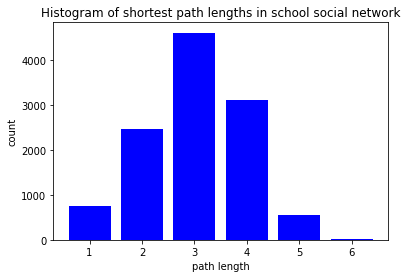

In [102]:
#G1:

plt.bar(bins[:-1],counts,color='b')
plt.xlabel('path length')
plt.ylabel('count')
plt.title('Histogram of shortest path lengths in school social network')